# Project Navigation Guidelines

In [ ]:
'''
===================================================
Notebook naming convention for FindMeInside (FMI)
===================================================
Notebook name: [FMI] <Coord/Label> Alg - Exp<experiment_number>, Trial<trial_number>

===================================================
Folder/File naming convention
===================================================
# Folder categorised by Experiment (except Testing folder)
Folder name: Experiment<Experiment_number>

# Each Folder has N files.
# A file is either a 1)Unprocessed Dataset, 2)Processed Dataset, 3)Results dataset, 4) Notebook file
# Each experiment has N trials. (Adjustments to parameters/algorithm are made in each trial)
Files in folder will be named accordingly...

- Raw data point:             E<experiment_number>_Label/Location<location_identifier>_<date>v<version_number>
-- e.g. E1_LabelA_230320v1
- Raw data collection:        E<experiment_number>_All_Raw_<date>v<version_number>
-- e.g. E1_All_Raw_230320v1
- Processed data (if any):    E<experiment_number>_All_Proc_<date>v<version_number>
-- e.g. E1_All_Proc_230320v1
- Resampled data (if any):    E<experiment_number>_resampled_t<trial_number>
-- e.g. E1_resampled_t1
- Results data:               E<experiment_number>_<algorithm>_t<trial_number>_k<number_of_neighbours>
-- e.g. E1_KNN_t1_k37

===================================================
List of experiment(s) & description(s)
===================================================
>> Experiment 1 (Exp1) :11 Sensors {1, ..., 11} , 4 Location Labels {A,B,C,D}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 11-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 11-Sensor RSSI Signature (x%)
>> Output: Location Label (Classification Model)

>> Experiment 2 (Exp2) :11 Sensors {1, ..., 11} , 4 Location Coords {(x_A, y_A), ... (x_D, y_D)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 11-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 11-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

>> Experiment 3 (Exp3) : 12 Sensors {0x1, ..., 0xC} , 12 Location Label {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 12-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 12-Sensor RSSI Signature (x%)
>> Output: Location Label (Classification Model)

>> Experiment 4 (Exp4) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 12-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 12-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

>> Experiment 5 (Exp5) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Averaged 12-Sensor RSSI Signature for 12 Locations
>> Tested Data: Averaged 12-Sensor RSSI Signature
>> Output: Location Coords (Regression Model)

>> Experiment 6 (Exp6) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Averaged 12-Sensor RSSI Signature for 12 Locations
>> Tested Data: Resampled 12-Sensor RSSI Signature
>> Output: Location Coords (Regression Model)

>> Experiment 7 (Exp7) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via FindMeInside Phone App
>> Trained Data: Sampled 12-Sensor RSSI Signature for 12 Locations (100-x%)
>> Tested Data: Sampled 12-Sensor RSSI Signature (x%)
>> Output: Label Coords (Label Model)

>> Experiment 8 (Exp8) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via FindMeInside Phone App
>> Trained Data: Sampled 12-Sensor RSSI Signature for 12 Locations (100-x%)
>> Tested Data: Sampled 12-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

'''
None

# Trial Description

In [14]:
exp = 10
trial = 1
'''
Trial 1
Algorithms use calcLocation mechanic
Resampling done within time period of 2s.
Distance weighting : 1/ (distance^2)
train/test includes original T4 dataset + T9 dataset

'''
None

# Core Libraries

In [2]:
import pandas as pd #from pandas import read_csv, pivot_table
import numpy as np
import math
import operator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# [Exploratory Data Analysis]

# Load Raw Train Dataset

# Resample/Reshape Train Dataset

# Parameter Optimisation

In [37]:
resampledDS = pd.read_csv('E10_resampled_T1.csv')
tempSeries = resampledDS['Location']
resampledDS = resampledDS.drop(columns=['Location', 'DatetimeSec'])
resampledDS["Location"] = tempSeries
resampledDS.head()
lastIndex = len(resampledDS)
numCol = len(resampledDS.columns)

ips_data = resampledDS.iloc[:lastIndex, :numCol-1]
# print(ips_data)
ips_labels = resampledDS.iloc[:lastIndex, numCol-1:]
# print(ips_labels)


# #dataset.iloc[rowrange, columnrange]
X = ips_data.to_numpy()
y = ips_labels.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True,test_size=0.3, random_state = 10) 
print("X_train: ", X_train)
print("y_train: ", y_train)
y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

k_value_rootN = math.ceil(math.sqrt(len(X_train)))
# print("estimated k value: ", k_value_rootN)
# print("X_test: ", X_test)
print("y_test: ", y_test)
print("y_train: ", y_train)

X_train:  [[177. 177. 180. ... 177. 187. 198.]
 [177. 179. 177. ... 182. 193.   0.]
 [  0. 177. 178. ... 182. 189. 183.]
 ...
 [  0.   0.   0. ... 193. 193. 192.]
 [  0. 177.   0. ... 190. 191. 179.]
 [177. 185. 190. ...   0. 177. 181.]]
y_train:  [['13,13']
 ['13,7']
 ['13,1']
 ...
 ['19,1']
 ['18,3']
 ['1,13']]
y_test:  ['19,1' '13,7' '19,1' ... '8,7' '19,1' '1,13']
y_train:  ['13,13' '13,7' '13,1' ... '19,1' '18,3' '1,13']


Text(0, 0.5, 'Error Rate')

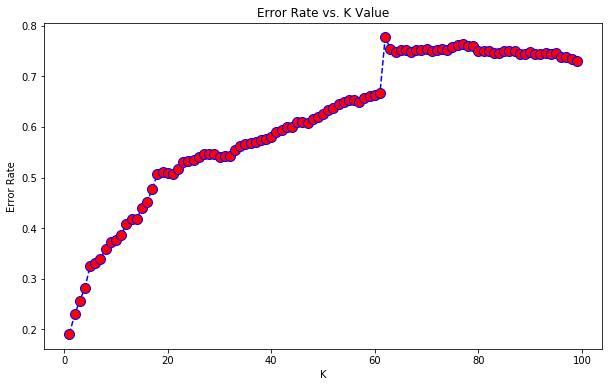

In [44]:
error_rate = []
# Will take some time

def invSqDist(distances):
    weightList = []
    for dist in distances[0]:
#         print(dist)
        weight = 1 / (1 if (dist == 0) else (dist**2))
        weightList.append(1/weight)
#         print(weight)
    return [weightList]

corrPred = 0
wrongPred = 0
predList = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i, weights=invSqDist)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    predList = (pred_i == y_test)
#     print("Actual")
#     print(y_test)
#     print("Output")
#     print(pred_i)
#     print(predList)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

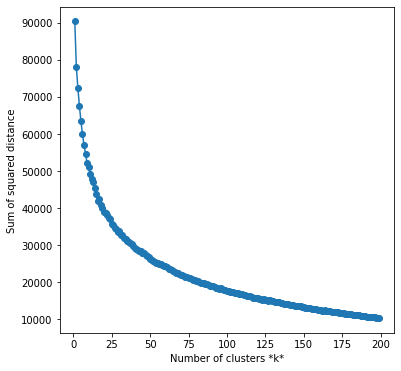

In [106]:
# Run the Kmeans algorithm and get the index of data points clusters
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
sse = []
list_k = list(range(1, 200))
X_std = StandardScaler().fit_transform(X)
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

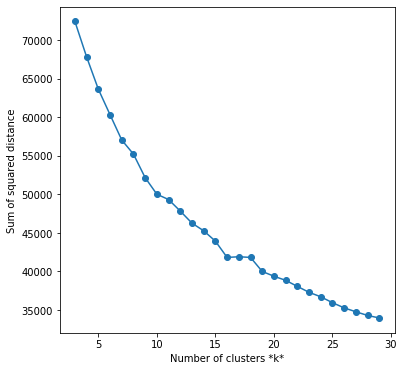

In [105]:
# Run the Kmeans algorithm and get the index of data points clusters
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
sse = []
list_k = list(range(3, 30))
X_std = StandardScaler().fit_transform(X)
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [72]:
X = preprocessing.normalize(X)
y = y.reshape(len(y),)
k_range = list(range(1, 64))

def invDist(distances):
    weightList = []
    for dist in distances[0]:
#         print(dist)
        weight = 1 / (1 if (dist == 0) else dist)
        weightList.append(1/weight)
#         print(weight)
    return [weightList]

classifier = KNeighborsClassifier(n_neighbors=3, weights=invDist)
# classifier.fit(X_train, y_train)

param_grid = dict(n_neighbors=k_range)
print(param_grid)

grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')

grid.fit(X,y)
print(grid.best_estimator_)
grid.cv_results_

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights=<function invSqDist at 0x12618e560>)


{'mean_fit_time': array([0.00935085, 0.00834348, 0.00783949, 0.0077563 , 0.00843163,
        0.00816581, 0.00790908, 0.00778801, 0.00805571, 0.00788605,
        0.00778041, 0.00787702, 0.00778272, 0.0078635 , 0.00772922,
        0.00784101, 0.00776615, 0.00781579, 0.00784738, 0.00782397,
        0.00798566, 0.00782385, 0.00776944, 0.00801721, 0.00780015,
        0.00786448, 0.00779092, 0.0080709 , 0.00778966, 0.00780592,
        0.00780575, 0.00782564, 0.00780714, 0.00784509, 0.00785213,
        0.00779886, 0.00778818, 0.00795014, 0.00780463, 0.0078218 ,
        0.00784004, 0.00785964, 0.00775943, 0.0079639 , 0.00773349,
        0.00784283, 0.00778103, 0.00778644, 0.00782697, 0.00781817,
        0.00792835, 0.00779214, 0.00775173, 0.00788064, 0.0079747 ,
        0.00790007, 0.00783436, 0.00790412, 0.00785143, 0.00788014,
        0.00785954, 0.00783403, 0.0078537 ]),
 'std_fit_time': array([1.76939689e-03, 9.35677731e-04, 1.91117909e-04, 1.80310946e-04,
        9.44822133e-04, 8.0085349

In [76]:
X = preprocessing.normalize(X)
y = y.reshape(len(y),)
k_range = list(range(1, 64))

def invSqDist(distances):
    weightList = []
    for dist in distances[0]:
#         print(dist)
        weight = 1 / (1 if (dist == 0) else (dist**2))
        weightList.append(1/weight)
#         print(weight)
    return [weightList]

classifier = KNeighborsClassifier(n_neighbors=3, weights=invSqDist)
# classifier.fit(X_train, y_train)

param_grid = dict(n_neighbors=k_range)
print(param_grid)

grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')

grid.fit(X,y)
print(grid.best_estimator_)
grid.cv_results_

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights=<function invSqDist at 0x12618ec20>)


{'mean_fit_time': array([0.00909855, 0.00859065, 0.00775411, 0.00771322, 0.00841329,
        0.00778463, 0.00782256, 0.00790195, 0.00782249, 0.00783105,
        0.00786707, 0.00781579, 0.00816987, 0.0078444 , 0.00784674,
        0.00784819, 0.00782433, 0.00793607, 0.00796564, 0.0078779 ,
        0.00788047, 0.00784948, 0.00785902, 0.00777659, 0.00780778,
        0.00780041, 0.00779867, 0.00779617, 0.00788181, 0.00779035,
        0.00777643, 0.00773051, 0.00778511, 0.00779893, 0.00782065,
        0.00778239, 0.00796542, 0.00874252, 0.00839763, 0.00812488,
        0.00859458, 0.00815136, 0.00793796, 0.00865889, 0.0080663 ,
        0.00815105, 0.00789351, 0.00781989, 0.00790095, 0.00775774,
        0.00805159, 0.00783234, 0.00779686, 0.00782444, 0.00817246,
        0.00785637, 0.00787539, 0.00798001, 0.007847  , 0.00785513,
        0.00786488, 0.00788243, 0.00791469]),
 'std_fit_time': array([1.75869130e-03, 9.40633511e-04, 1.59059377e-04, 1.38797059e-04,
        1.17426802e-03, 1.2024101